In [16]:
library(dplyr)
library(ggplot2)
library(gutenbergr)
library(janeaustenr)
library(scales)
library(stringr)
library(tidyr)
library(tidytext)

In [2]:
text <- c(
    "Because I could not stop for Death -",
    "He kindly stopped for me -",
    "The Carriage held but just Ourselves -",
    "and Immortality"
)
print(text)

[1] "Because I could not stop for Death -"  
[2] "He kindly stopped for me -"            
[3] "The Carriage held but just Ourselves -"
[4] "and Immortality"                       


In [3]:
text_df <- dplyr::tibble(line = 1:4, text=text)
print(text_df)

# A tibble: 4 x 2
   line text                                  
  <int> <chr>                                 
1     1 Because I could not stop for Death -  
2     2 He kindly stopped for me -            
3     3 The Carriage held but just Ourselves -
4     4 and Immortality                       


In [4]:
text_df %>% tidytext::unnest_tokens(word, text)

line,word
<int>,<chr>
1,because
1,i
1,could
1,not
1,stop
1,for
1,death
2,he
2,kindly


In [5]:
original_books <- austen_books() %>%
    group_by(book) %>%
    mutate(
        linenumber = row_number(),
        chapter = cumsum(
            str_detect(
                text,
                regex("^chapter [\\divxlc]", ignore_case=TRUE)
            )
        )
    ) %>%
    ungroup()
print(original_books)

# A tibble: 73,422 x 4
   text                    book                linenumber chapter
   <chr>                   <fct>                    <int>   <int>
 1 "SENSE AND SENSIBILITY" Sense & Sensibility          1       0
 2 ""                      Sense & Sensibility          2       0
 3 "by Jane Austen"        Sense & Sensibility          3       0
 4 ""                      Sense & Sensibility          4       0
 5 "(1811)"                Sense & Sensibility          5       0
 6 ""                      Sense & Sensibility          6       0
 7 ""                      Sense & Sensibility          7       0
 8 ""                      Sense & Sensibility          8       0
 9 ""                      Sense & Sensibility          9       0
10 "CHAPTER 1"             Sense & Sensibility         10       1
# ... with 73,412 more rows


In [6]:
tidy_books <- original_books %>% 
    unnest_tokens(word, text)

print(tidy_books)

# A tibble: 725,064 x 4
   book                linenumber chapter word       
   <fct>                    <int>   <int> <chr>      
 1 Sense & Sensibility          1       0 sense      
 2 Sense & Sensibility          1       0 and        
 3 Sense & Sensibility          1       0 sensibility
 4 Sense & Sensibility          3       0 by         
 5 Sense & Sensibility          3       0 jane       
 6 Sense & Sensibility          3       0 austen     
 7 Sense & Sensibility          5       0 1811       
 8 Sense & Sensibility         10       1 chapter    
 9 Sense & Sensibility         10       1 1          
10 Sense & Sensibility         13       1 the        
# ... with 725,054 more rows


In [7]:
data(stop_words)
tidy_books <- tidy_books %>% 
    anti_join(stop_words)
tidy_books %>% 
    count(word, sort=TRUE)

Joining, by = "word"



word,n
<chr>,<int>
miss,1855
time,1337
fanny,862
dear,822
lady,817
sir,806
day,797
emma,787
sister,727


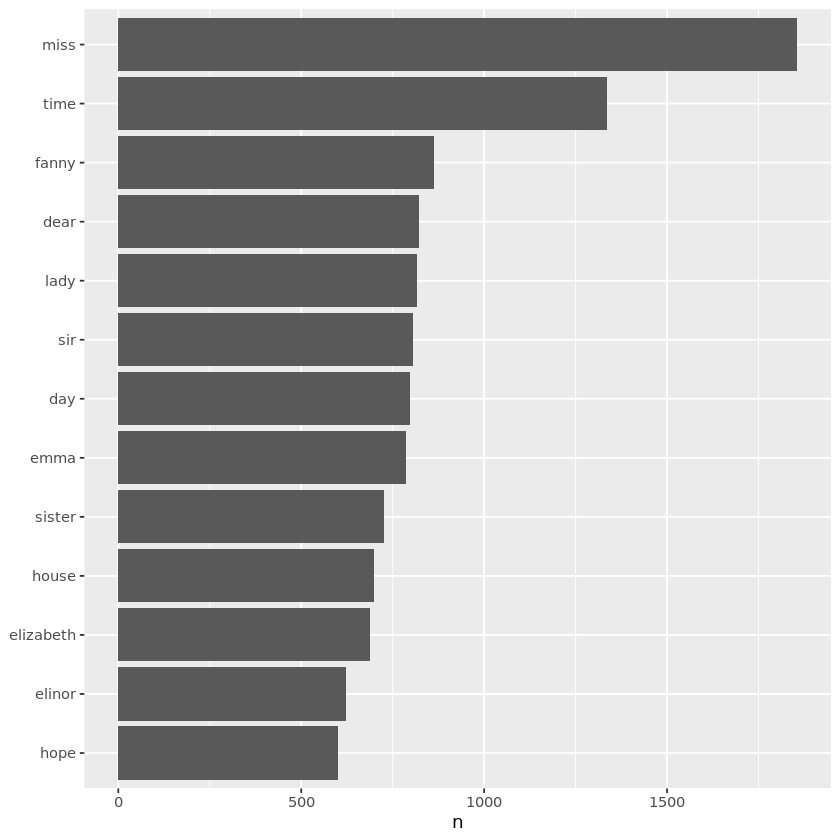

In [8]:
tidy_books %>% 
    count(word, sort=TRUE) %>% 
    filter(n > 600) %>% 
    mutate(word=reorder(word, n)) %>% 
    ggplot(aes(n, word)) + 
        geom_col() +
        labs(y=NULL)

In [9]:
hgwells <- gutenberg_download(c(35, 36, 5230, 159))
hgwells

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest

Using mirror http://aleph.gutenberg.org



gutenberg_id,text
<int>,<chr>
35,The Time Machine
35,
35,An Invention
35,
35,by H. G. Wells
35,
35,
35,CONTENTS
35,


In [10]:
tidy_hgwells <- hgwells %>% 
    unnest_tokens(word, text) %>% 
    anti_join(stop_words)

Joining, by = "word"



In [11]:
tidy_hgwells %>% 
    count(word, sort=TRUE) %>% 
    head(10)

word,n
<chr>,<int>
time,461
people,302
door,260
heard,249
black,232
stood,229
white,224
hand,218
kemp,213


In [12]:
bronte <- gutenberg_download(c(1260, 768, 969, 9182, 767))
head(bronte)

gutenberg_id,text
<int>,<chr>
767,Agnes Grey
767,"A NOVEL,"
767,
767,by ACTON BELL.
767,
767,LONDON:


In [13]:
tidy_bronte <- bronte %>% 
    unnest_tokens(word, text) %>% 
    anti_join(stop_words)

Joining, by = "word"



In [14]:
tidy_bronte %>% 
    count(word, sort=TRUE) %>% 
    head(10)

word,n
<chr>,<int>
time,1064
miss,854
day,826
hand,767
eyes,713
don<U+2019>t,666
night,648
heart,638
looked,601


In [15]:
frequency <- bind_rows(
    mutate(tidy_bronte, author = "Brontë Sisters"),
    mutate(tidy_hgwells, author = "H.G. Wells"), 
    mutate(tidy_books, author = "Jane Austen")) %>% 
  mutate(word = str_extract(word, "[a-z']+")) %>%
  count(author, word) %>%
  group_by(author) %>%
  mutate(proportion = n / sum(n)) %>% 
  select(-n) %>% 
  pivot_wider(names_from = author, values_from = proportion) %>%
  pivot_longer(
      `Brontë Sisters`:`H.G. Wells`,
      names_to = "author", values_to = "proportion"
)
print(frequency)

# A tibble: 57,252 x 4
   word      `Jane Austen` author                 proportion
   <chr>             <dbl> <chr>                       <dbl>
 1 a            0.00000919 Bront<U+00EB> Sisters  0.0000352 
 2 a            0.00000919 H.G. Wells            NA         
 3 aback       NA          Bront<U+00EB> Sisters  0.00000391
 4 aback       NA          H.G. Wells             0.0000148 
 5 abaht       NA          Bront<U+00EB> Sisters  0.00000391
 6 abaht       NA          H.G. Wells            NA         
 7 abandon     NA          Bront<U+00EB> Sisters  0.0000313 
 8 abandon     NA          H.G. Wells             0.0000148 
 9 abandoned    0.00000460 Bront<U+00EB> Sisters  0.0000900 
10 abandoned    0.00000460 H.G. Wells             0.000178  
# ... with 57,242 more rows


Warning message:
"Removed 40861 rows containing missing values (geom_point)."
Warning message:
"Removed 40863 rows containing missing values (geom_text)."


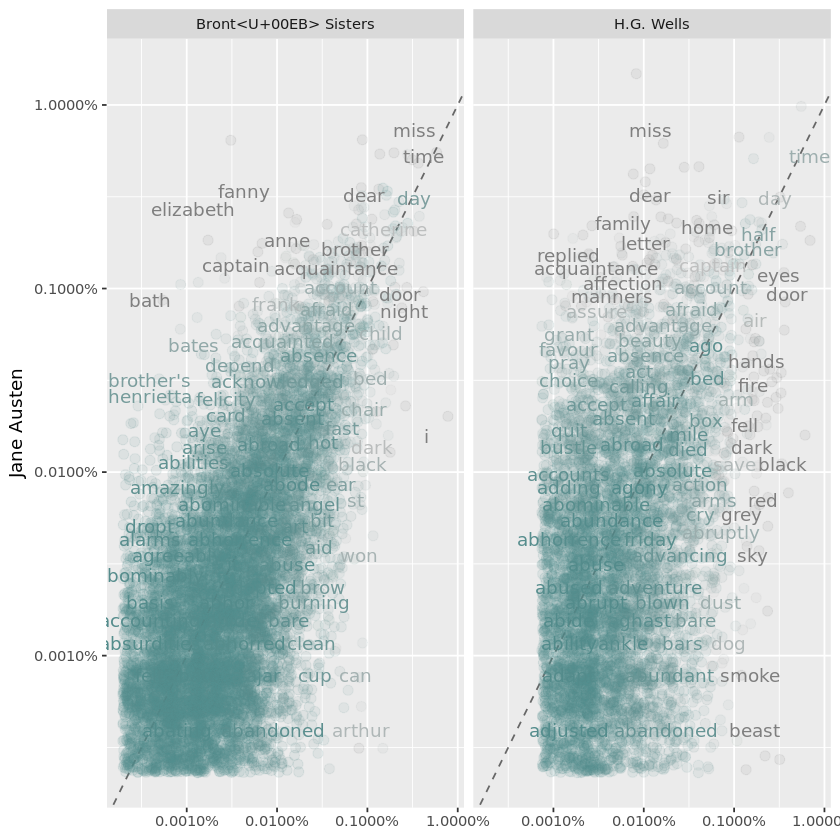

In [17]:
ggplot(
    frequency, aes(
        x = proportion,
        y = `Jane Austen`, 
        color = abs(`Jane Austen` - proportion)
    )
) +
geom_abline(color = "gray40", lty = 2) +
geom_jitter(alpha = 0.1, size = 2.5, width = 0.3, height = 0.3) +
geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +
scale_x_log10(labels = percent_format()) +
scale_y_log10(labels = percent_format()) +
scale_color_gradient(
    limits = c(0, 0.001), 
    low = "darkslategray4", high = "gray75") +
facet_wrap(~author, ncol = 2) +
theme(legend.position="none") +
labs(y = "Jane Austen", x = NULL)

In [18]:
cor.test(
    data = frequency[frequency$author == "Brontë Sisters",],
    ~ proportion + `Jane Austen`
)


	Pearson's product-moment correlation

data:  proportion and Jane Austen
t = 111.11, df = 10344, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7287247 0.7462980
sample estimates:
      cor 
0.7376362 


In [19]:
cor.test(
    data = frequency[frequency$author == "H.G. Wells",], 
    ~ proportion + `Jane Austen`
)


	Pearson's product-moment correlation

data:  proportion and Jane Austen
t = 36.07, df = 6043, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3999377 0.4414292
sample estimates:
      cor 
0.4209036 
